In [203]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [204]:
# variant 27
# u" + 2 th(x) u' + 1 / ch^4 (x) u = -4 thx - 2x / ch^4 (x)
# u(0) + u'(0) = -1, u'(1) = -1.6960
# u0(x) = sin(th(x)) - 2x

In [205]:
# parameters that can be changed

h = 0.05

In [206]:
# function declaration
# k(0) u'(0) = delta_1 u(0) - epsilon_1
# -k(1) u'(1) = delta_2 u(1) - epsilon_2
# d/dx (k(x)u'(x)) - q(x) u = - f(x)

# d/dx (ch^2(x) u'(x)) + 1 / ch^2(x) u(x) = -4 sh(x) ch(x) - 2x / ch^2(x)

start = 0
end = 1

delta_1 = -1
epsilon_1 = 1
delta_2 = 0
epsilon_2 = -pow(sp.cosh(1).n(), 2) * 1.6960

x = sp.symbols('x')
k = pow(sp.cosh(x), 2)
q = -1 / pow(sp.cosh(x), 2)
f = 4 * sp.sinh(x) * sp.cosh(x) + 2 * x / pow(sp.cosh(x), 2)

u0 = sp.sin(sp.tanh(x)) - 2 * x

In [207]:
# coords

n = round((end - start) / h) + 1
coords = [start + i * h for i in range(n)]

In [208]:
# forward

a0 = k.subs(x, 0).n()
b0 = -(k.subs(x, 0).n() + delta_1 * h)
c0 = 0
d0 = -epsilon_1 * h

a = [a0]
b = [b0]
c = [c0]
d = [d0]

for i in range(1, n):
    a.append(k.subs(x, coords[i] + h/2).n())
    b.append(-(k.subs(x, coords[i] + h/2).n() + k.subs(x, coords[i] - h/2).n() + pow(h, 2) * q.subs(x, coords[i]).n()))
    c.append(k.subs(x, coords[i] - h/2).n())
    d.append(- f.subs(x, coords[i]).n() * pow(h, 2))

a.append(0)
b.append(-(k.subs(x, 1).n() + delta_2 * h).n())
c.append(k.subs(x, 1).n())
d.append(-epsilon_2 * h)

alpha0 = -a[0]/b[0]
beta0 = d[0]/b[0]

alpha = [alpha0]
beta = [beta0]

for i in range(1, n):
    alpha.append(- a[i] / (b[i] + c[i] * alpha[i - 1]))
    beta.append((d[i] - c[i] * beta[i - 1]) / (b[i] + c[i] * alpha[i - 1]))

In [209]:
# backward

un = (d[n] - c[n] * beta[n - 1]) / (b[n] + c[n] * alpha[n - 1])
u = [un]
for i in range(n - 1, -1, -1):
    u.append(alpha[i] * u[len(u) - 1] + beta[i])
u.reverse()

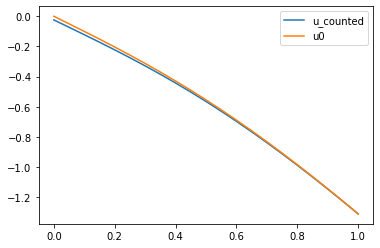

In [211]:
# plotting

u0coords = [u0.subs(x, coords[i]) for i in range(n)]
plt.plot(coords, u[:n])
plt.plot(coords, u0coords)
plt.legend(['u_counted', 'u0'])